# Regressão Linear


___


___
Carregando algumas bibliotecas:

In [1]:
%matplotlib inline
import math

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
from IPython.display import display  # Para ter melhor print.
from scipy import stats

___
## Índice

- [Questão 1](#q1) **Empresa de Marketing - Mídias Sociais**
    - [Item a](#q1_a)
    - [Item b](#q1_b)
    - [Item c](#q1_c)
- [Questão 2](#q2) **Seguro Saúde**
    - [Item a](#q2_a)
    - [Item b](#q2_b)
    - [Item c](#q2_c)
- [Questão 3](#q3) **Usina Termoelétrica**
    - [Item a](#q3_a)
    - [Item b](#q3_b)
    - [Item c](#q3_c)
    - [Item d](#q3_d)

___

<div id="q1"></div>

# Questão 1


<img src="questao2.jpg">

Fonte: https://lanspublicidade.com.br/empresa-midias-sociais/

Uma empresa de marketing pretende avaliar o impacto de três mídias publicitárias (youtube, facebook e jornal) nas suas vendas. 

Os dados contêm os gastos em publicidade feitas nessas três mídias: youtube, facebook e jornal (em milhares de dólares) junto com as vendas (em milhares de unidades). 

O dataframe a seguir contem os dados dos gastos nessas três mídias e da quantidade vendida, em um ano, de 200 franquias diferentes.

Adaptado de: [Marketing data set](https://rdrr.io/github/kassambara/datarium/man/marketing.html).


In [2]:
df = pd.read_excel("marketing.xlsx")

In [3]:
df.head(3)

,youtube,facebook,newspaper,sales
0,276.12,45.36,83.04,26.52
1,53.40,47.16,54.12,12.48
2,20.64,55.08,83.16,11.16


---

<div id="q1_a"></div>

**a)** Construa uma visualização adequada para analisar o impacto do gasto com cada mídia publicitária nas vendas.

Faça uso do `subplot()` para construir esses três gráficos adequadamente. Interprete-os.

### **Ajuste de regressão linear múltiplo** 

O modelo de regressão linear múltiplo com o método dos mínimos quadrados ordinário, através da biblioteca ``statsmodels`` é dado por:

In [5]:
### Função utilitária para fazer a regressão com constante adicionada


def regress(Y, X):
    """
    Y: coluna do DataFrame utilizada como variável resposta (TARGET)
    X: coluna(s) do DataFrame utilizadas como variável(is) explicativas (FEATURES)
    """
    X_cp = sm.add_constant(X)
    model = sm.OLS(Y, X_cp)
    results = model.fit()

    return results

In [6]:
X = df[["youtube", "facebook", "newspaper"]]
Y = df["sales"]

In [7]:
results = regress(Y, X)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Mon, 31 May 2021   Prob (F-statistic):           1.58e-96
Time:                        22:18:39   Log-Likelihood:                -422.65
No. Observations:                 200   AIC:                             853.3
Df Residuals:                     196   BIC:                             866.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.5267      0.374      9.422      0.000       2.789       4.265
youtube        0.0458      0.001     32.809      0.000       0.043       0.049
facebook       0.1885      0.009     21.893      0.000       0.172       0.206
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         545.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

---

<div id="q1_b"></div>


**b)** Segundo o relatório sumário do modelo, quais coeficientes são relevantes? Podemos afirmar que existe uma relação entre cada mída publicitária e vendas? Explique detalhadamente usando o valor-p do teste nas suas conclusões.

---

<div id="q1_c"></div>

**c)** Quais suposições do modelo de regressão linear estão satisfeitas e quais não foram satisfeitas neste problema?

___

<div id="q2"></div>

# Questão 2
## Conjunto de Dados: Seguro Saúde

<img src="./doctor.jpg" width=100% alt="Fonte: https://atchealthcarerhr.com/wp-content/uploads/2018/08/iStock-695218436-e1534801414819.jpg"> </img>

O arquivo `insurance.csv` possui dados de custos médicos individuais cobrados por seguro de saúde. Esta base foi disponibilizada por [Miri Choi](https://www.kaggle.com/mirichoi0218/insurance) no Kaggle.

As variáveis contidas no *dataset* são:

- `age`: idade do beneficiário;
- `sex`: gênero do beneficiário;
- `bmi`: índice de massa corporal (IMC) em $kg/m^2$;
- `children`: número de crianças/dependentes cobertos pelo seguro;
- `smoker`: fumante;
- `region`: área residencial do beneficiário (nos EUA);
- `charges`: custos médicos individuais.

Vamos começar carregando os dados.

In [2]:
dados = pd.read_csv('insurance.csv')
dados.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


___

<br>

**Responda:**

---

<div id="q2_a"></div>

**a)** Construa 2 gráficos de dispersão para analisar a relação das variáveis `age` e `bmi` com os custos médicos (`charges`). Em cada gráfico, separe os dados dos beneficiários fumantes dos não fumantes utilizando cores distintas. Deve ser possível identificar o que cada gráfico representa sem consultar o código, ou seja, os gráficos devem possuir títulos, no mínimo.

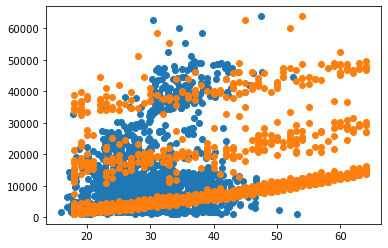

In [4]:
# ESCREVA SEU CÓDIGO AQUI


---

<div id="q2_b"></div>

**b)** Considerando apenas os fumantes na análise, ajuste um modelo linear múltiplo utilizando as variáveis `age` e `bmi` para explicar a variável `charges`. Baseado no resultado do ajuste, quais variáveis são relevantes para explicar a variável `charges`? Explique como chegou a essa conclusão.

In [12]:
# ESCREVA SEU CÓDIGO AQUI

<font color=red>ESCREVA SUA EXPLICAÇÃO AQUI</font>

---

<div id="q2_c"></div>

**c)** A partir dos valores `Prob(Omnibus)` e `Prob(JB)` obtidos no item **b**, o que podemos concluir?

<font color=red>ESCREVA SUA CONCLUSÃO AQUI</font>

___

<div id="q3"></div>

# Questão 3

## Usina Termoelétrica


Uma usina termoelétrica converte calor (gerado pela queima de combustível) em energia mecânica, e esta para energia elétrica. Turbinas são impulsionadas por gases em expansão (vapor d'água, por exemplo), girando um eixo que está acoplado a um gerador elétrico. Esses gases são resfriados através da troca de calor com o meio ambiente, e retornam ao ciclo para serem novamente aquecidos, se expandirem, moverem as turbinas, etc.

<img src='Rankine_cycle_layout.png' width=800></img>

https://en.wikipedia.org/wiki/Rankine_cycle

De acordo com a teoria da Termodinâmica, quanto menor a temperatura ambiente, mais eficiente será a geração de energia. Queremos investigar a validade dessa teoria com dados reais.

O dataframe a seguir contem dados sobre a potência gerada por uma usina termoelétrica real e a temperatura ambiente.

In [14]:
df = pd.read_csv('power.csv')

In [15]:
df.head()

,Temp. Ambiente,Potência Gerada
0,14.96,463.26
1,25.18,444.37
2,5.11,488.56
3,20.86,446.48
4,10.82,473.90


---

<div id="q3_a"></div>

**a)** Construa uma visualização adequada dos dados para este problema.

---

<div id="q3_b"></div>

**b)** Ajuste um modelo de regressão linear simples com o método dos mínimos quadrados ordinário, através da biblioteca ``statsmodels``, e mostre o relatório sumário do ajuste do modelo.

---

<div id="q3_c"></div>

**c)** Segundo o relatório sumário do modelo, quais coeficientes são relevantes? Podemos afirmar que existe uma relação entre a temperatura ambiente e a potência gerada?

---

<div id="q3_d"></div>

**d)** Quais suposições do modelo de regressão linear estão satisfeitas e quais não foram satisfeitas neste problema?